<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/review10_Module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Step 2: Create a Simple Dataset
We will use the following dataset:

Hours Studied	  Marks
2	55
4	60
6	70
8	80
10	88
# We turn this into NumPy arrays.

In [79]:
#Created a simple dataset:
hours = np.array([2,4,6,8,10]).reshape(-1,1) # reshape used kora hoiche 2D model er jonno 2D na hoile model kaj korbe na
marks = np.array([55,60,70,80,88])

hours,marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

In [80]:
#df = pd.DataFrame(hours,columns=['Hours'])
#df['Marks'] = marks
#df

In [81]:
model = LinearRegression()
model.fit(hours,marks)

LinearRegression()

y = mx + c   ei khane m = slope, c = intercept

In [82]:
print("m:",model.coef_[0]) # eita slope ber korar jonno
print("c:",model.intercept_) # intercept ber korar jonno

m: 4.3
c: 44.8


eqestion ta emon hobe

Y = mx + c

Y = 4.3x + 44.8

### Step 5: Visualize the Best Fit Line
Below:

Blue dots = actual student data

,Red line = best fit line learned by the model

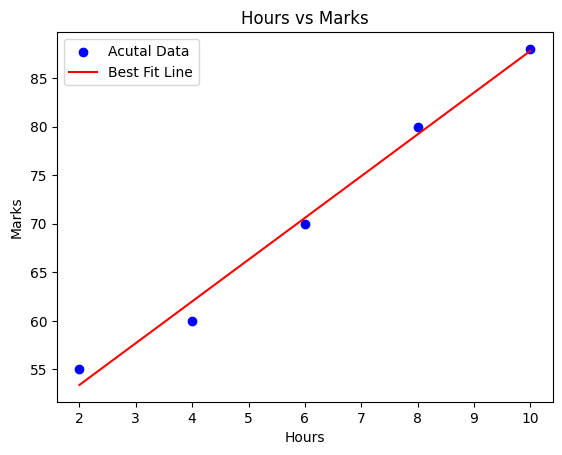

In [83]:
#Visualize Best fit line
plt.scatter(hours,marks,color='blue',label="Acutal Data")

predict_marks = model.predict(hours)

plt.plot(hours,predict_marks,color="red",label="Best Fit Line")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("Hours vs Marks")
plt.legend()
plt.show()

In [84]:
#prediction mark for new student
new_hours = np.array([[7]])
prediction = model.predict(new_hours)
print("prediction mark :",prediction[0])

prediction mark : 74.89999999999999


### Module-10-part-2-review

In [85]:
hours = np.array([2,4,6,8,10]).reshape(-1,1)
marks = np.array([55,60,70,80,88])

hours,marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

In [86]:
model = LinearRegression()
model.fit(hours,marks)

LinearRegression()

In [87]:
print("m:",model.coef_[0])
print("c:",model.intercept_)

m: 4.3
c: 44.8


Step 4: Compute the Cost (Mean Squared Error) Using a Library
The Mean Squared Error (MSE) is our cost function for regression.

We do not compute it manually.
Instead, we use mean_squared_error from sklearn.metrics.

In [88]:
#compute the Cost (mean squared Error) using a Library
from sklearn.metrics import mean_squared_error
pred_marks = model.predict(hours)
mse = mean_squared_error(marks,pred_marks) # ekta dataset er error koyta kemon tar hisab
print("Mean_Squ_Error =",round(mse,2))

Mean_Squ_Error = 1.52


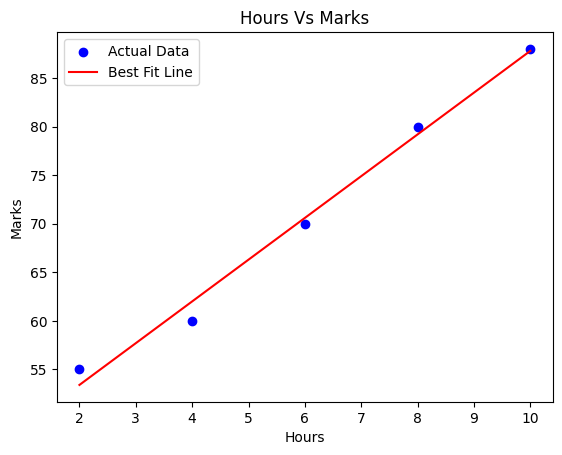

In [89]:
#Visulization the Dataset and best fit line
plt.scatter(hours,marks,color="blue",label="Actual Data")

#predict_marks = model.predict(hours)

plt.plot(hours,pred_marks,color="red",label="Best Fit Line")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("Hours Vs Marks")
plt.legend()
plt.show()

tep 6: Use a Gradient-Descent-Based Model – SGDRegressor
SGDRegressor is a regression model that uses Stochastic Gradient Descent (SGD) internally.
We will:

Fit SGDRegressor on the same data
Compare its slope, intercept, and MSE with LinearRegression
You can think of SGDRegressor as:

“Same goal (best line), but using gradient descent steps instead of a direct formula.”

In [90]:
#Use a Gradient-Descent-Based Model – SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(
    max_iter=1000,
    learning_rate="invscaling",
    eta0=0.01,
    random_state=42
)

sgd.fit(hours,marks)
print("m:",sgd.coef_[0])
print("c:",sgd.intercept_[0])

pred_sgd_marks = sgd.predict(hours)
print("Prediction Marks =",pred_marks)
mse = mean_squared_error(marks,pred_marks)
print("MSE Error =",mse)

m: 5.698065492806587
c: 34.475265427340794
Prediction Marks = [53.4 62.  70.6 79.2 87.8]
MSE Error = 1.5200000000000033


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


1️⃣ max_iter = 1000

👉 Model কতবার training data দেখবে

Gradient Descent কতবার চলবে

মানে: 1000 iteration / epoch

বেশি দিলে → ভালো শেখে

খুব বেশি দিলে → সময় বেশি লাগতে পারে

📌 সহজভাবে:

“Model সর্বোচ্চ 1000 বার নিজেকে ঠিক করবে”

2️⃣ learning_rate = "invscaling"

👉 Learning rate কীভাবে কমবে সেটা নির্ধারণ করে

invscaling মানে:

learning rate
=
𝜂
0
𝑡
𝑝
𝑜
𝑤
𝑒
𝑟
_
𝑡
learning rate=
t
power_t
η
0
	​

	​


শুরুতে বড় step

ধীরে ধীরে step size কমে

Stable learning হয়

📌 কেন দরকার?

শুরুতে দ্রুত শেখা, পরে ধীরে ধীরে fine tuning

3️⃣ eta0 = 0.01

👉 Initial learning rate

প্রথম iteration-এ step size = 0.01

খুব বড় হলে → model লাফাবে (diverge)

খুব ছোট হলে → শেখা slow

📌 সাধারণত safe range:
0.001 – 0.01

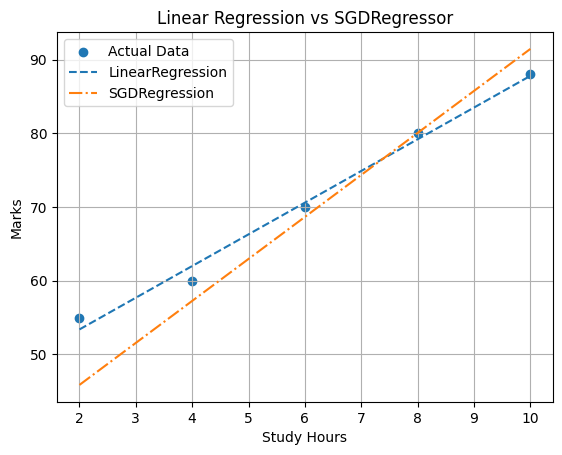

In [93]:
plt.scatter(hours, marks, label="Actual Data")

plt.plot(hours, pred_marks, label="LinearRegression", linestyle="--")
plt.plot(hours, pred_sgd_marks, label="SGDRegression", linestyle="-.")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression vs SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()

Module 10 – Part 03: Regression Evaluation Metrics (R², MAE, RMSE)

In [94]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
#Create Dataset
hours = np.array([2, 4, 6, 8, 10]).reshape(-1,1)
marks = np.array([55, 60, 70, 80, 88])
hours, marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

In [96]:
#Fit Linear Regression
model = LinearRegression()
model.fit(hours, marks)
pred = model.predict(hours)
print(pred)

[53.4 62.  70.6 79.2 87.8]


In [97]:
#Compute Metrics
mae = mean_absolute_error(marks,pred)
mse = mean_squared_error(marks, pred)
rmse = np.sqrt(mse)
r2 = r2_score(marks, pred)

In [98]:
#Print Results
print("MAE: ", mae)
print("MSE", mse)
print("RMSE", rmse)
print("R^2:",r2)

MAE:  1.040000000000002
MSE 1.5200000000000033
RMSE 1.2328828005937966
R^2: 0.9898286937901499


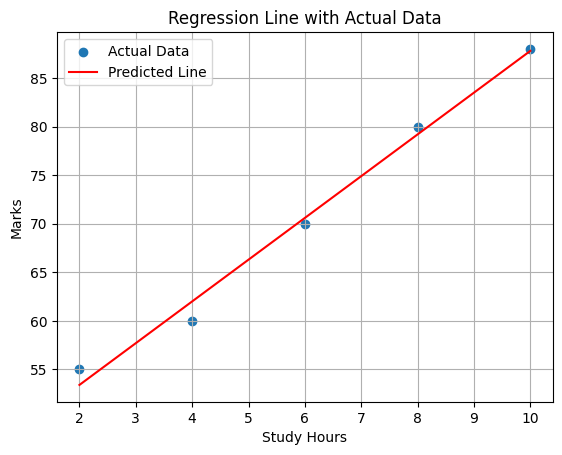

In [99]:
#Visualizing the Fit
plt.scatter(hours, marks, label="Actual Data")
plt.plot(hours, pred, color="red", label="Predicted Line")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Regression Line with Actual Data")
plt.legend()
plt.grid(True)
plt.show()